In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from vae.utils import read_cifar_data, read_atari_observations
import numpy as np
import pandas as pd
import os
os.chdir("vae")

In [2]:
# data=read_cifar_data([2])
data=read_atari_observations()

In [3]:
data.shape

(50155, 84, 84, 4)

In [3]:
from VAE import VariationalAutoencoder
vae=VariationalAutoencoder((84,84,4), [(32, 8, 4), (64, 4, 2), (64, 3, 1)],[], 128, 1e-3, use_shared_weights=False)

/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [3]:
from AE import Autoencoder
vae=Autoencoder((84,84,4), [(64, 8, 2), (128, 6, 3), (128, 4, 2), (128, 3, 1)], [1000,500], 100, learning_rate=0.0001,  use_shared_weights=False)

/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

Flattened shape: 1152


WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:33: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:251: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:37: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:39: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



In [17]:
lcurve=pd.read_csv("cost_record.csv")

In [76]:
lcurve_1=pd.read_csv("runs/small CNN, 128/cost_record.csv")

In [77]:
lcurve_2=pd.read_csv("runs/large CNN, 128/cost_record.csv")

In [73]:
lcurve_3=pd.read_csv("runs/small CNN, 64/cost_record.csv")

In [20]:
lcurve_4=pd.read_csv("runs/latent100, batch_size64/cost_record.csv")

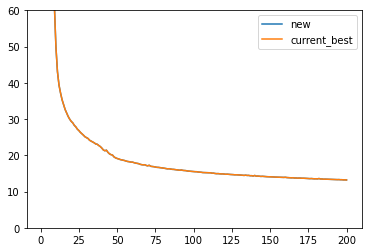

In [21]:
plt.plot(lcurve.Epoch, lcurve["test_cost"],label="new")
# plt.plot(lcurve_1.Epoch, lcurve_1["test_cost"],label="small,128")
# plt.plot(lcurve_2.Epoch, lcurve_2["test_cost"],label="large,128")
# plt.plot(lcurve_3.Epoch, lcurve_3["test_cost"],label="small,64")
plt.plot(lcurve_4.Epoch, lcurve_4["test_cost"],label="current_best")
plt.ylim(0,60)
plt.legend()

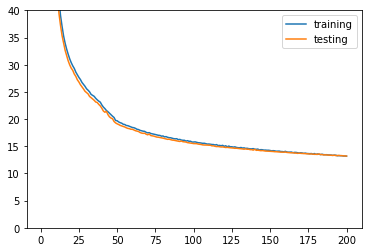

In [19]:
plt.plot(lcurve.Epoch, lcurve["training_cost"],label="training")
plt.plot(lcurve.Epoch, lcurve["test_cost"],label="testing")
plt.ylim(0,40)
plt.legend()

In [4]:
vae.load_model("runs/latent100, batch_size64/model")

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:64: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

WARNING - From /home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [5]:
selected_data=data[np.random.randint(0,10000,size=18)]
rec=np.array(vae.reconstruct(selected_data/255)*255,np.uint8)
sbs_original=np.moveaxis(np.array([selected_data,rec]),(0,1,-1),(1,0,2))
sbs=sbs_original.reshape((-1,)+data.shape[1:-1])

In [8]:
enc=vae.encode(selected_data/255)

(array([  1.,   1.,   5.,  15.,  25.,  42.,  67., 109., 155., 148., 167.,
        144.,  91.,  71.,  42.,  29.,  20.,  10.,   8.,   2.]),
 array([-3.1427703 , -2.8277192 , -2.5126681 , -2.1976168 , -1.8825657 ,
        -1.5675147 , -1.2524635 , -0.9374123 , -0.6223612 , -0.30731004,
         0.00774109,  0.32279223,  0.6378434 ,  0.9528945 ,  1.2679456 ,
         1.5829968 ,  1.8980479 ,  2.213099  ,  2.52815   ,  2.8432014 ,
         3.1582525 ], dtype=float32),
 <BarContainer object of 20 artists>)

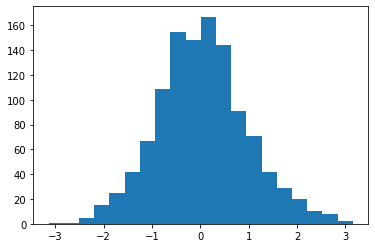

In [13]:
plt.hist(enc.flatten(),bins=20)

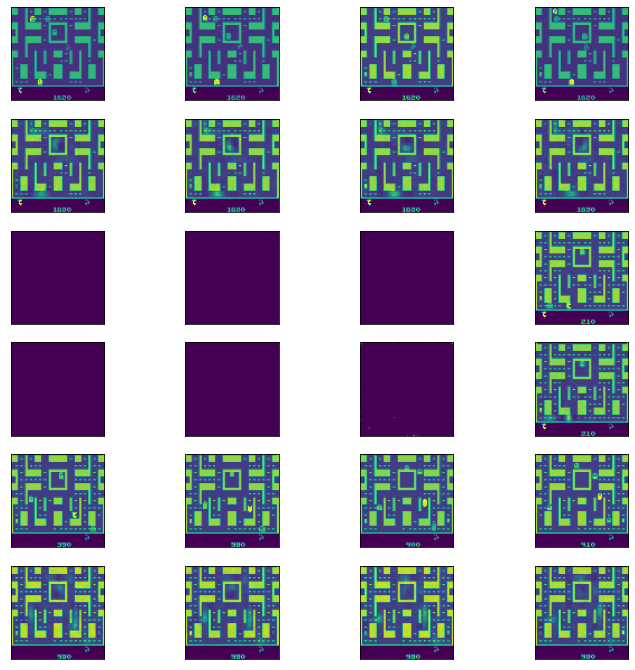

In [6]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, idx in zip(axs.flat, range(36)):
    ax.imshow(sbs[idx])


# plt.tight_layout()

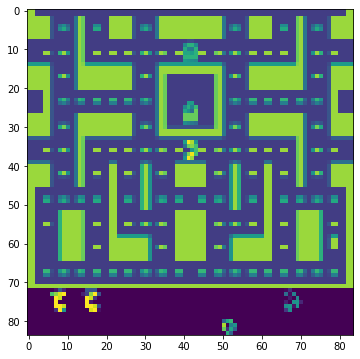

In [7]:
plt.figure(figsize=(6,6))
plt.imshow(sbs_original[15][0][3])

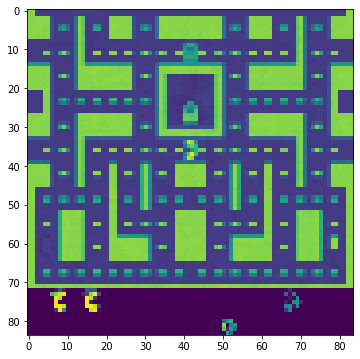

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(sbs_original[15][1][3])